In [1]:
import math
import random
import numpy

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

tensor(0.0117) tensor(1.0030)
tensor(0.0307) tensor(5.4100)


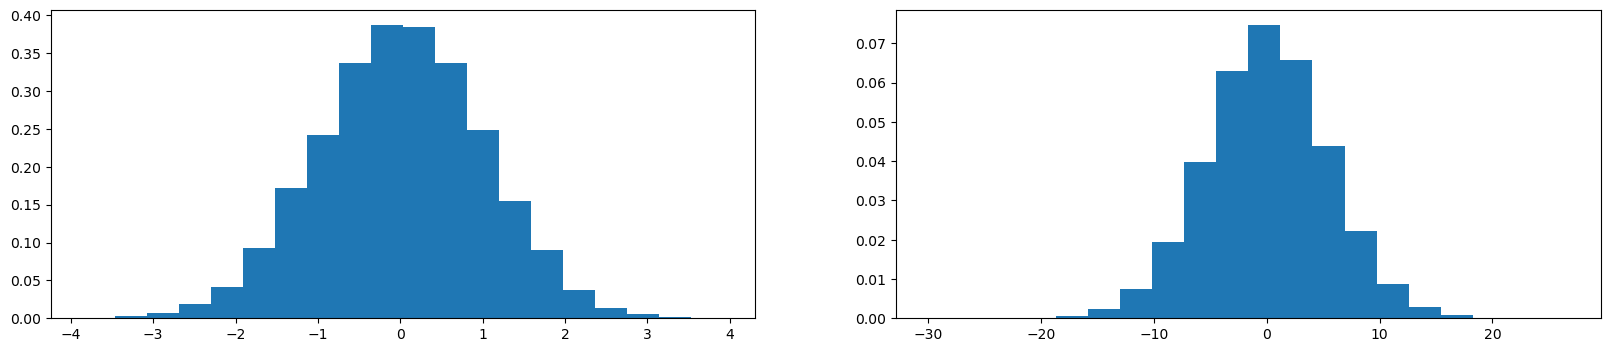

In [11]:
x = torch.randn(1000, 30) # 1000 inputs with 30 dims
w = torch.randn(30, 200) # 30 inputs, 200 neurons

y = x @ w 

# 
print(x.mean(), x.std())
print(y.mean(), y.std())

plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 20, density=True);
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 20, density=True);

the stddev of x is 1.0030 but when x is acted upon by the w, it loses its sttdv and becomes much higher, 5.4100!!!

How can we scale the w's to preserve the distribution? What should we mulitply it by?

According to [Kaiming He et al.](https://openaccess.thecvf.com/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf) and [PyTorch Documentaion](https://pytorch.org/docs/stable/nn.init.html, 

we should scale the w's by gain/(fan_mode)**(0.5)

For the above example, we wil use fan_mode as fan_in, and lets say we are usinng tanh activation function

tensor(-0.0016) tensor(0.9997)
tensor(-0.0020) tensor(1.6591)


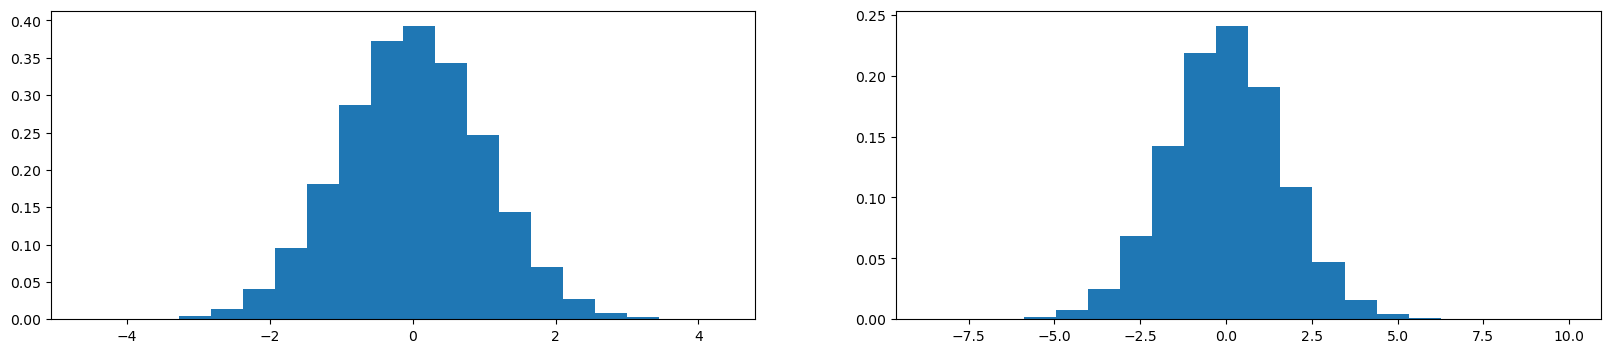

In [21]:
# correct way to initialise the network

tanh_gain = (5/3)
fan_in_w = 30
scaling_factor = (tanh_gain/ ((fan_in_w) ** 0.5))

x = torch.randn(10000, 30) 
w = torch.randn(30, 200) * scaling_factor

y = x @ w 

# 
print(x.mean(), x.std())
print(y.mean(), y.std())

plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 20, density=True);
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 20, density=True);

Much better!!